In [24]:
import os
os.chdir("..")

import warning
wsarnings.filterwarnings("ignore")

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from lib import *

%matplotlib inline

In [3]:
# paths to data
TRAIN = os.path.join("data", "train")
TRAIN_MSK = os.path.join("data", "train_mask")
VAL= os.path.join("data", "valid")
VAL_MSK = os.path.join("data", "valid_mask")

# Визуальный  анализ

В начале оценим качество данных и масок на случайной подвыборке

In [29]:
# load images
images = os.listdir(TRAIN)
validation = os.listdir(VAL)

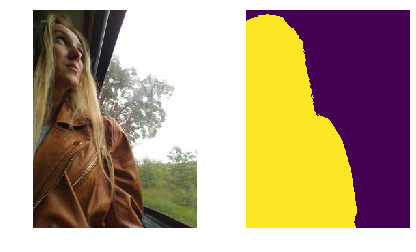

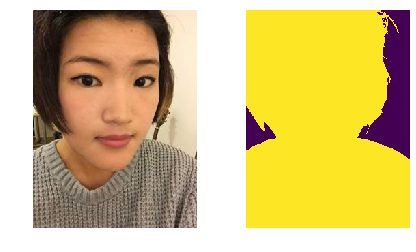

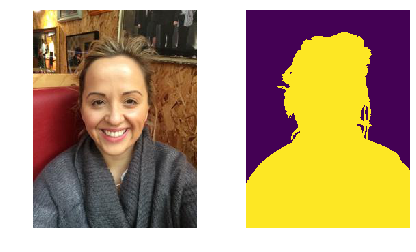

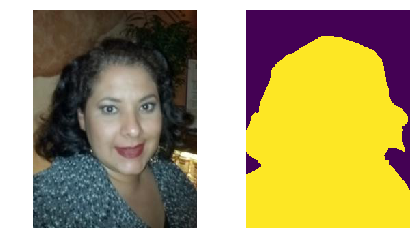

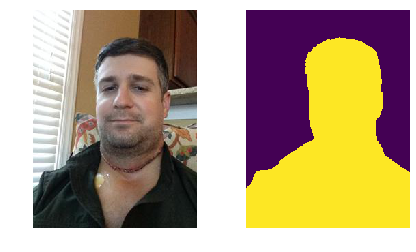

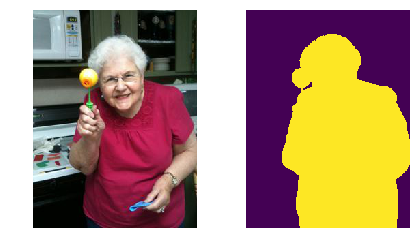

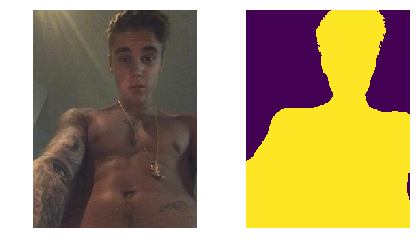

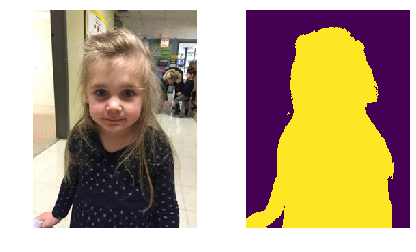

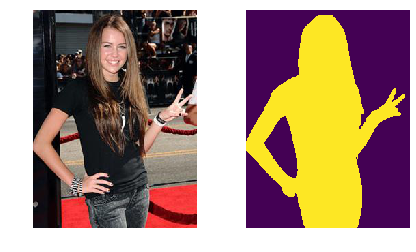

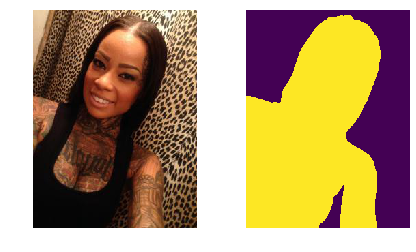

In [14]:
sample = np.random.choice(images, 10)

for elem in sample:
    ind = elem.split(".")[0]
    img = np.array(plt.imread(os.path.join(TRAIN, f"{ind}.jpg")))
    mask = np.array(plt.imread(os.path.join(TRAIN_MSK, f"{ind}.png")))
    show_img_with_mask(img, mask, figsize=(7,4))

В датасете содержатся крупные изображения людей. Человек занимает значительную часть кадра.

Маски на границах (особенно в волосах) часто являются достаточно шумными. Если какой-либо объект или предмет одежды находится в руках у человека, то этот объект также включен в маску.

Рассмотрим среднее значение и стандартное отклонение доли человека в кадре.

mean:  0.5948995
std:  0.16290855


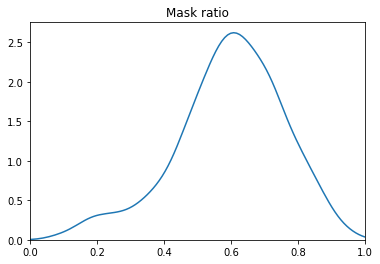

In [26]:
mask_aspects = [np.mean(plt.imread(os.path.join(TRAIN_MSK, 
                                                f"{img.split('.')[0]}.png"
                                               ))) for img in images]

sns.kdeplot(mask_aspects)
plt.xlim(0,1)
plt.title("Mask ratio")
print("mean: ", np.mean(mask_aspects))
print("std: ", np.std(mask_aspects))

Из графика плотности видно, что маска занимает большую часть кадра.

Для улучшения качества границ масок и уменьшения шума используем медианный фильтр с ядром 5х5.

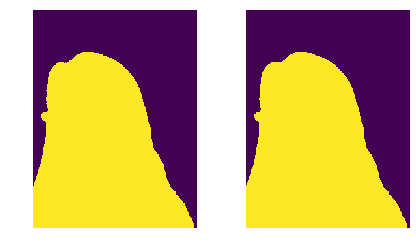

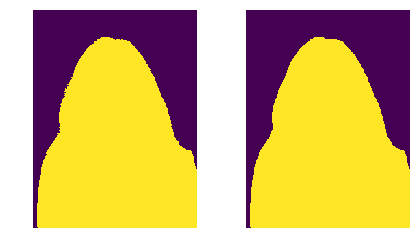

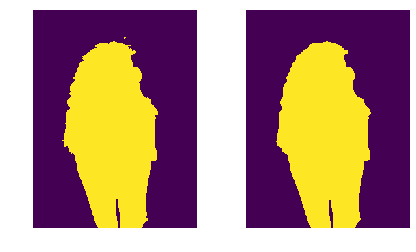

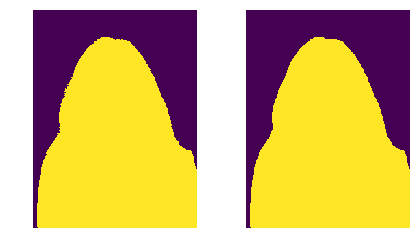

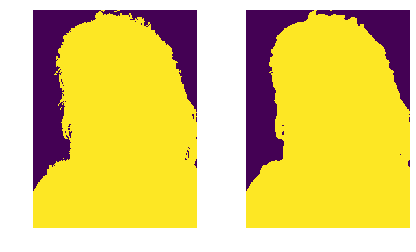

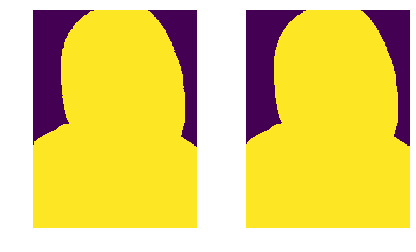

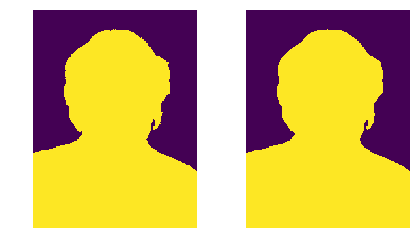

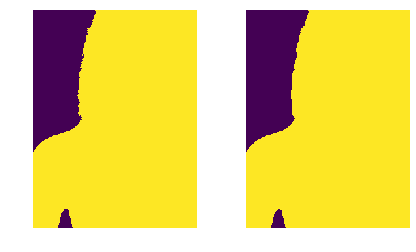

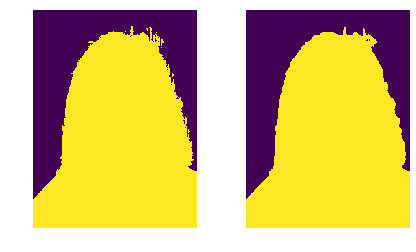

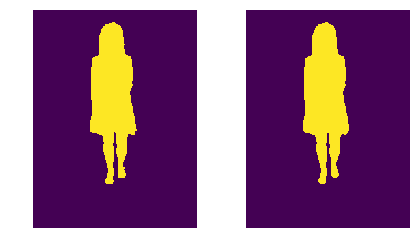

In [27]:
sample = np.random.choice(images, 10)

for elem in sample:
    ind = elem.split(".")[0]
    mask = np.array(plt.imread(os.path.join(TRAIN_MSK, f"{ind}.png")))
    processed = cv2.medianBlur(mask, 5)
    show_img_with_mask(mask, processed, figsize=(7,4))

После обработки, граицы масок стали более плавными.

Применим данную предобработку ко всем маскам

In [28]:
# train
for elem in images:
    ind = elem.split(".")[0]
    mask = np.array(plt.imread(os.path.join(TRAIN_MSK, f"{ind}.png")))
    mask = cv2.medianBlur(mask, 5)
    plt.imsave(os.path.join(TRAIN_MSK, f"{ind}.png"), mask)

In [31]:
# validation
for elem in validation:
    ind = elem.split(".")[0]
    mask = np.array(plt.imread(os.path.join(VAL_MSK, f"{ind}.png")))
    mask = cv2.medianBlur(mask, 5)
    plt.imsave(os.path.join(VAL_MSK, f"{ind}.png"), mask)

Также в качестве предобработки проведем выравнивание гистограмм исходных изображений для получения более однородных снимков

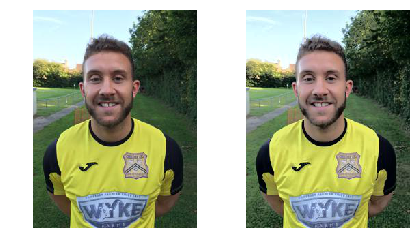

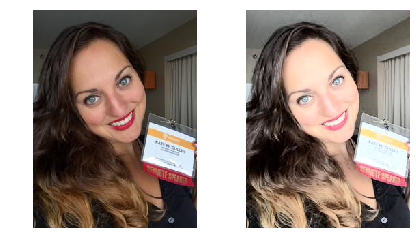

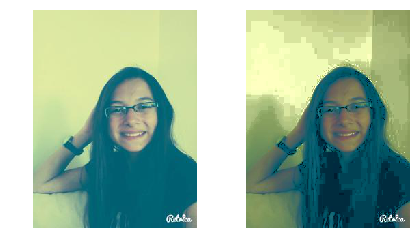

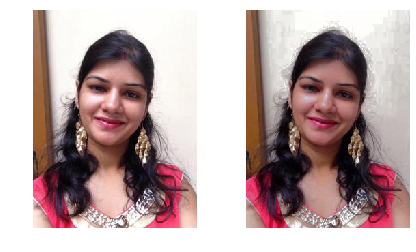

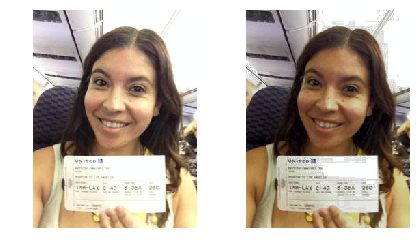

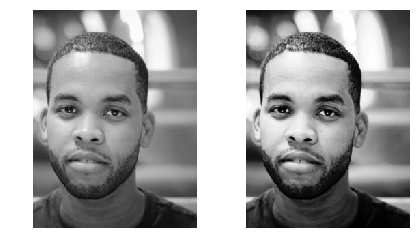

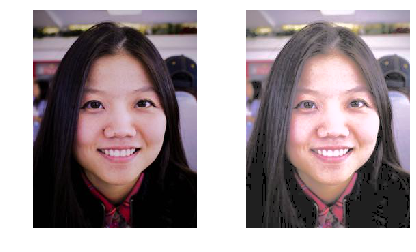

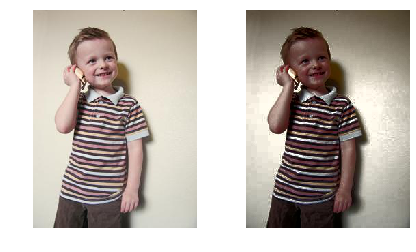

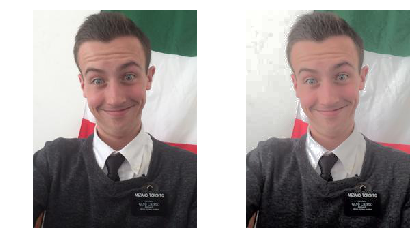

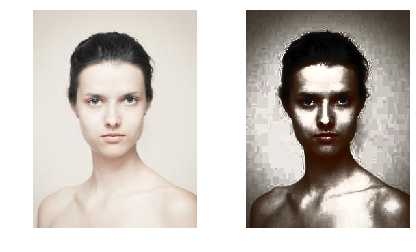

In [48]:
# code from https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image

sample = np.random.choice(images, 10)

for elem in sample:
    ind = elem.split(".")[0]
    img = np.array(plt.imread(os.path.join(TRAIN, f"{ind}.jpg")))
    processed = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    processed[:,:,0] = cv2.equalizeHist(processed[:,:,0])
    processed = cv2.cvtColor(processed,cv2.COLOR_YUV2RGB)
    show_img_with_mask(img, processed, figsize=(7,4))

Видно, что в довольно большом количестве изображений после подобной обработки качество только ухудшилось, поэтому данная предобработка не пойдет в итоговую модель.